In [200]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [201]:
df = pd.read_csv("diabetes.csv")
df.isna().all() # Total False

# Разделение на признаки и целевую переменную
X = df.drop("Outcome", axis=1)
Y = df["Outcome"]

# Масштабирование данных
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns) 

## 1. Табличное представление статистики по датасету:

In [202]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2. Графическое представление статистики по датасету:

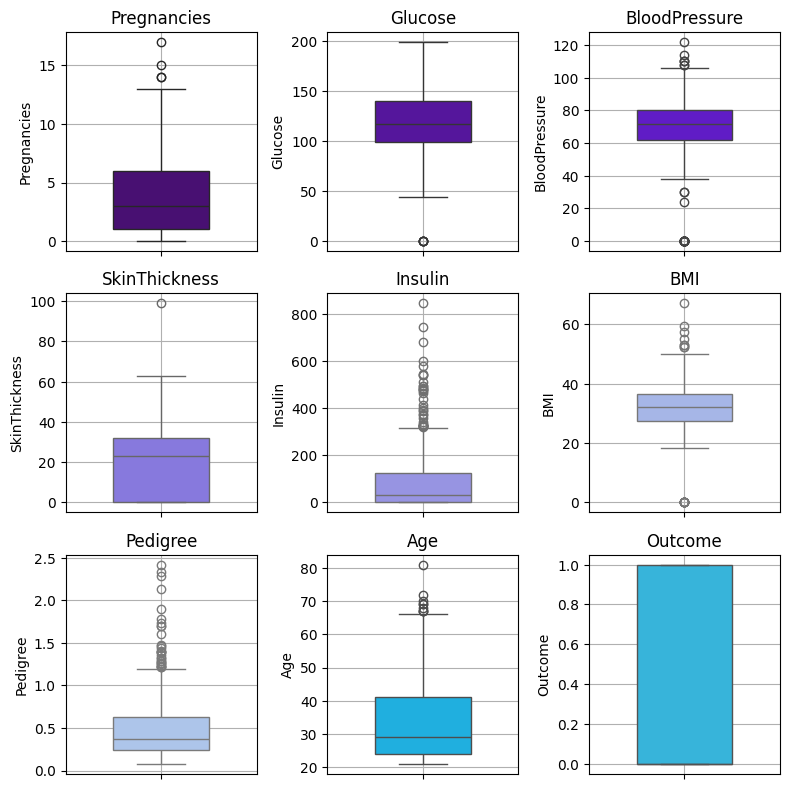

In [203]:
plt.figure(figsize=(8, 8))

parameters = df.columns
colors = ['#4B0082', '#5300B2', '#5A00E2','#7B68EE', '#8B87EF', '#9BB1F2', '#A3C3F4', '#00BFFF', '#1CC3F5',]


for i, parameter in enumerate(parameters):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[parameter], color=colors[i], width=0.5)
    plt.title(parameter)
    plt.grid()

plt.tight_layout()
plt.show()

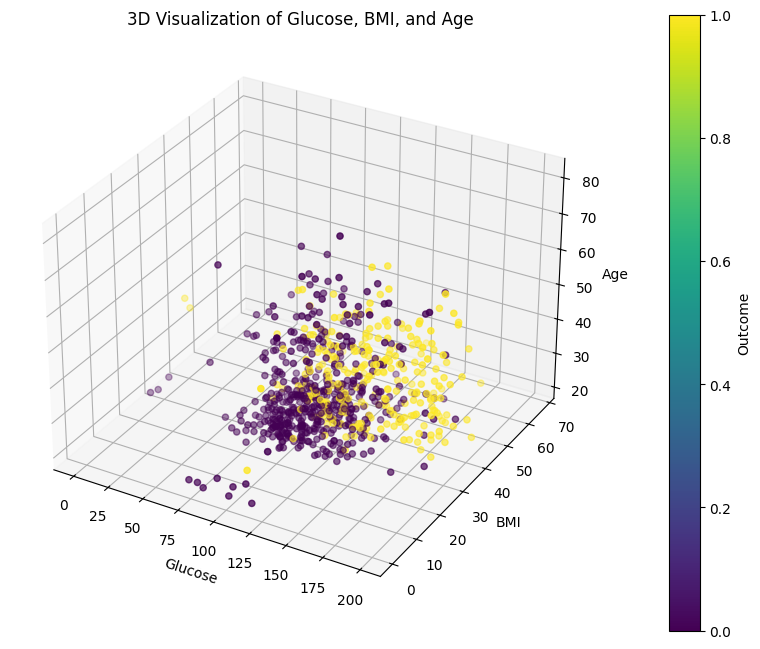

In [204]:
x = df['Glucose']
y = df['BMI']
z = df['Age']


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x, y, z, c=df['Outcome'], cmap='viridis')

ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')
ax.set_title('3D Visualization of Glucose, BMI, and Age')

plt.colorbar(scatter, label='Outcome', pad=0.1)

plt.show()

## 3. Реализация метода k-ближайших соседей

In [205]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def predict(X_train, y_train, X_test, k):
    predictions = []
    for test_instance in X_test:
        # Расстояние до всех точек в обучающей выборке
        distances = [euclidean_distance(test_instance, x) for x in X_train]
        
        # Индексы k ближайших соседей
        k_indices = np.argsort(distances)[:k]
        
        # Метки ближайших соседей
        k_nearest_labels = y_train[k_indices]
        
        # np.unique для нахождения наиболее частой метки
        unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
        majority_vote = unique_labels[np.argmax(counts)]  # Находим метку с максимальным количеством
        predictions.append(majority_vote)
    
    return np.array(predictions)

## 4. Модели и оценка

### Модель 1:

In [206]:
num_features = 5
random_features = np.random.choice(X_scaled.columns, size=num_features, replace=False)
X_random = X_scaled[random_features]

X_train, X_test, y_train, y_test = train_test_split(X_random, Y, test_size=0.2, random_state=42)

for k in [3, 5, 10, 15, 50]:
    predictions = predict(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), k)
    accuracy = np.mean(predictions == y_test.to_numpy())
    print(f'Accuracy for k={k}: {accuracy}')
    
    cm = confusion_matrix(y_test, predictions)
    print(f'Confusion Matrix for k={k}:\n{cm[0]}\n{cm[1]}\n')

Accuracy for k=3: 0.7142857142857143
Confusion Matrix for k=3:
[77 22]
[22 33]

Accuracy for k=5: 0.7077922077922078
Confusion Matrix for k=5:
[75 24]
[21 34]

Accuracy for k=10: 0.6818181818181818
Confusion Matrix for k=10:
[80 19]
[30 25]

Accuracy for k=15: 0.7207792207792207
Confusion Matrix for k=15:
[81 18]
[25 30]

Accuracy for k=50: 0.7207792207792207
Confusion Matrix for k=50:
[86 13]
[30 25]



### Модель 2:

In [207]:
X_fixed = X_scaled[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'Age']]

X_train, X_test, y_train, y_test = train_test_split(X_fixed, Y, test_size=0.2, random_state=42)

for k in [3, 5, 10, 15, 50]:
    predictions = predict(X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), k)
    accuracy = np.mean(predictions == y_test.to_numpy())
    print(f'Accuracy for k={k}: {accuracy}')
    
    cm = confusion_matrix(y_test, predictions)
    print(f'Confusion Matrix for k={k}:\n{cm[0]}\n{cm[1]}\n')

Accuracy for k=3: 0.6818181818181818
Confusion Matrix for k=3:
[72 27]
[22 33]

Accuracy for k=5: 0.7077922077922078
Confusion Matrix for k=5:
[77 22]
[23 32]

Accuracy for k=10: 0.7402597402597403
Confusion Matrix for k=10:
[83 16]
[24 31]

Accuracy for k=15: 0.7467532467532467
Confusion Matrix for k=15:
[81 18]
[21 34]

Accuracy for k=50: 0.7532467532467533
Confusion Matrix for k=50:
[86 13]
[25 30]

